#### **Lab 7: Cubic Spline Interpolation**

In this lab we will explore interpolation using cubic splines.

We will be practicing on the set of data:

$x = [1,2,3,4,5,6]$

$y = [0,4,5,12,14,8]$

The arrays are initialized and plotted below. The data point are plotted as filled circles and are joined with straight lines. This is a linear spline interpolation.

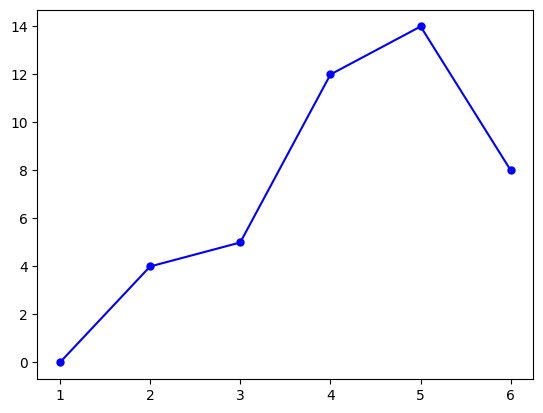

In [1]:
# Provided code

%reset -f

import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5,6],dtype = float)
y = np.array([0,4,5,12,14,8],dtype = float)

plt.plot(x,y, 'bo-', markersize=5)

**Let's explore some conceptual questions:**
1. How many points are we fitting?
2. How many coefficients does that mean we need to determine?
3. How many equations would that require?
4. Why would we use Cubic Splines instead of Lagrange Interpolation?

Here is a relevant link: https://www.geeksforgeeks.org/cubic-spline-interpolation/

**Recall the equations for cubic splines,** where $Ak=B$ and $k$ is a vector of curvatures. The $i$th row of $A$ is all zeros except for:

$$A_{i,i-1}=\frac{h_{i-1}}{6},\qquad A_{i,i}=\frac{h_{i-1}}{3}+\frac{h_i}{3},\qquad A_{i,i+1}=\frac{h_i}{6}$$

And the corresponding element of $B$ is:

$$B_i = \frac{-y_i+y_{i-1}}{h_{i-1}}+\frac{-y_i+y_{i+1}}{h_i}$$

Such that we can define each spline $f_i$ as:

$$f_i = k_i\left(\frac{x^2}{2}-\frac{x^3}{6h_i}\right)+\frac{x^3k_{i+1}}{6h_i}+c_{1i}x+c_{2i}$$

where

$$c_{1i}=-\frac{h^2_ik_{i+1}+2k_ih^2_i-6y_{i+1}+6y_i}{6h_i}, \qquad c_{2i}=y_i$$

Note that the first and last rows of $A$ will depend on boundary conditions.

**1. By hand, try calculating the first three equations that we need to solve for a cubic interpolation.**

**2. Next, try using SciPy's CubicSpline function to interpolate our points above.** 

Use the natural boundary condition.
- What does this boundary condition mean?
- How are the other boundary conditions different?

Plot the points as well as the function that interpolates them.

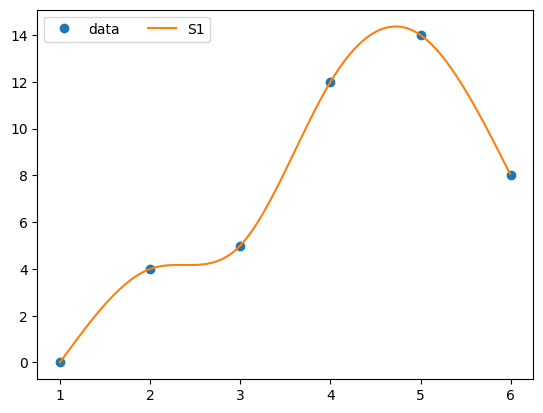

In [2]:
# Starter code

from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6], dtype=float)
y = np.array([0, 4, 5, 12, 14, 8], dtype=float)
plt.plot(x, y, 'o', label="data")
bc = [ 'not-a-knot', 'periodic', 'clamped', 'natural']

cs = CubicSpline(x, y, bc_type = bc[3])
xs = np.arange(min(x), max(x), .01)
plt.plot(xs, cs(xs), label="S1")
plt.legend(loc="upper left", ncol=2)
plt.show()

**3. Let's compare Cubic Splines to Lagrange Interpolation.**

Use your code from last week to do this for the same set of points. Plot both interpolations on the same plot. What do you observe?

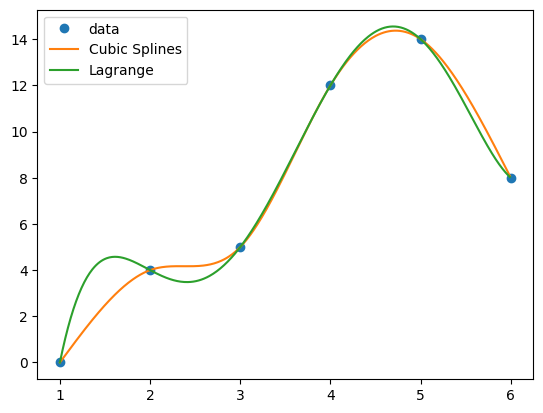

In [3]:
# Starter code

from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6], dtype=float)
y = np.array([0, 4, 5, 12, 14, 8], dtype=float)
plt.plot(x, y, 'o', label="data")
bc = [ 'not-a-knot', 'periodic', 'clamped', 'natural']

lg = CubicSpline(x, y, bc_type = bc[3])
lg = lagrange(x, y)
xs = np.arange(min(x), max(x), .01)
plt.plot(xs, cs(xs), label="Cubic Splines")
plt.plot(xs, lg(xs), label="Lagrange")
plt.legend(loc="upper left")
plt.show()

**4. Now try it on a larger dataset.**

Use Numpy's random functions to create a list of equispaced $x$ points whose $y$ values range from 0 to 10. Use both Cubic Splines and Lagrange Interpolation to interpolate. You are encouraged to time both functions. Which is faster? Which plot looks nicer?

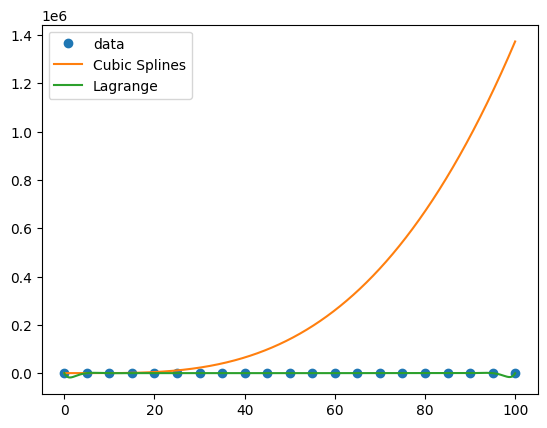

In [4]:
# Starter code

from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
import numpy as np
import time

x = np.linspace(0, 100, 21)
y = np.random.rand(21)*10

plt.plot(x, y, 'o', label="data")
bc = [ 'not-a-knot', 'periodic', 'clamped', 'natural']

lg = CubicSpline(x, y, bc_type = bc[3])
lg = lagrange(x, y)
xs = np.arange(min(x), max(x), .01)
plt.plot(xs, cs(xs), label="Cubic Splines")
plt.plot(xs, lg(xs), label="Lagrange")
plt.legend(loc="upper left")
plt.show()